# Problem Statement :

- The university has collect data of students like the number of hours studied, all prvious scores, whether the student has done any extracurriculur activities, total hours the student takes sleep, the count of total question papers practiced along with performance index.
- Predict Performance Index of the students based on the other factors considered.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Student_Performance.csv")
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
data.shape

(10000, 6)

# Observations:
- The dataset contains 10000 rows and 6 columns
- Each row represents one single students data.

# Step 3: Data Cleaning, Data Wrangling & Data Preprocessing

In [4]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

<Axes: >

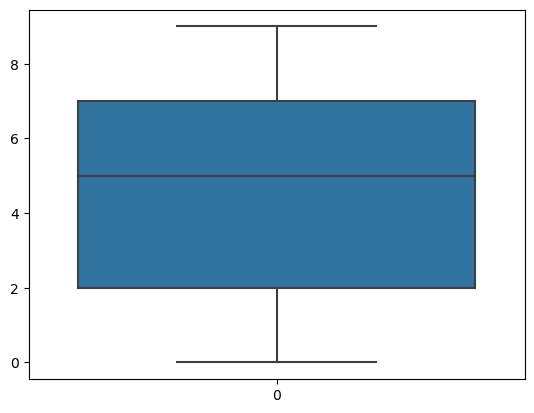

In [8]:
sns.boxplot(data['Sample Question Papers Practiced'])

# Observation:
- There are no missing values in the data
- There are no outliers in this data

In [9]:
# Perform Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms

MinMaxScaler()

In [10]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [11]:
cols_to_be_scaled = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"]
data[cols_to_be_scaled] = mms.fit_transform(data[cols_to_be_scaled])

In [12]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.750,1.000000,Yes,1.0,0.111111,91.0
1,0.375,0.711864,No,0.0,0.222222,65.0
2,0.875,0.186441,Yes,0.6,0.222222,45.0
3,0.500,0.203390,Yes,0.2,0.222222,36.0
4,0.750,0.593220,No,0.8,0.555556,66.0


In [13]:
# Perform Data Encoding

dic = {
    "No" : 0, "Yes" : 1
}
dic

{'No': 0, 'Yes': 1}

In [14]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].replace(dic)
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.750,1.000000,1,1.0,0.111111,91.0
1,0.375,0.711864,0,0.0,0.222222,65.0
2,0.875,0.186441,1,0.6,0.222222,45.0
3,0.500,0.203390,1,0.2,0.222222,36.0
4,0.750,0.593220,0,0.8,0.555556,66.0


# Step 4 : Seperate X and y

In [15]:
X = data.drop('Performance Index', axis = 1)
y = data['Performance Index']

# Step 5 : Split the data into train set and test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [19]:
X_train.shape, X_test.shape

((7500, 5), (2500, 5))

In [20]:
y_train.shape, y_test.shape

((7500,), (2500,))

# Step 6 : Apply Linear Regression on the train set

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [22]:
lr.fit(X_train, y_train)

LinearRegression()

# Step 7: Perform prediction on the X_test

In [23]:
y_pred = lr.predict(X_test)
y_pred

array([50.45690146, 53.09930205, 78.25332644, ..., 44.82033293,
       66.16369669, 83.69119201])

In [24]:
X_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9394,0.375,0.457627,0,1.0,0.333333
898,0.875,0.338983,0,0.0,0.777778
2398,0.625,0.847458,0,0.2,0.666667
5906,0.000,0.186441,1,0.4,0.666667
2343,0.125,0.847458,0,0.2,1.000000
...,...,...,...,...,...
8764,0.750,0.000000,0,0.8,0.888889
4359,0.375,0.033898,1,0.2,0.777778
2041,0.875,0.169492,0,0.8,0.777778
1108,0.750,0.559322,1,1.0,0.555556


In [27]:
lr.coef_

array([22.81623212, 60.11959677,  0.65904621,  2.3884913 ,  1.70012106])

In [28]:
lr.intercept_

11.433258244622493

- The Linear Regression equation will look like:
- Performance Index = 22.82 * Hours Studied + 60.11 *	Previous Scores + 0.7 * Extracurricular Activities + 2.30 * Sleep Hours + 1.70 * Sample Question Papers Practiced

# Step 8: Check Accuracy and Error

In [25]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred)

0.9884684482161901

In [26]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.0205702066595226

# Insight:
- Previous Score and Hours Studied has a hugh impact on the Performance Index of the student.
- If the previous scores are not good then do not promote the student untill the student get better in the performance index